#### 1. INTRODUCTION

    1.1 Project Objective
    1.2 Importance
    1.3 Dataset Overview and Assumptions
    1.4 Analysis Insight

#### 2. IMPORT RELEVANT LIBRARIES AND OPERATION SETUP

#### 3. DATA COLLECTION AND PREPARATION

#### 4. EXPLORATORY DATA ANALYSIS
    
    4.1 Analysing the categorical features
    4.2 Analysing the numerical features

#### 5. FEATURE ENGINEERING
    5.1 Creating the interactive feature
    5.2 Encoding the categorical variable
    5.3 Scaling
    
#### 6. MODEL TRAINING AND EVALUATION
    6.1 Model Training and Evaluation Part 1
    6.2 Model Training and Evaluation Part 2
    6.3 Model Training and Evaluation Part 3

#### 7. MODEL INTERPREATION AND REPORTING

#### 8. CONCLUSION





### 1. INTRODUCTION

    

    
   
    

**1.1 Projective Objective**
    
The primary objective of this project is to develop a robust machine learning model to predict house prices based on             various features such as area space, number of rooms, availability of amenities, and other relevant attributes. The goal is to create a model that accurately estimates house prices, which can be leveraged by stakeholders in the real estate industry, including buyers, sellers, and investors, to make informed decisions.

The project involves data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluation of model performance to identify the best model for predicting house prices.

   **1.2 Importance**
   
   The problem of predicting house prices is highly relevant to the real estate industry, which is a significant sector in the global economy. Accurate price predictions can assist buyers in determining fair market value, help sellers set competitive prices, and enable investors to assess potential returns on investment. The ability to predict house prices with high accuracy has practical applications in financial planning, market analysis, and risk assessment. This project addresses a critical need in the real estate market, where price estimation is often influenced by various factors, and a reliable predictive model can provide valuable insights, thereby significantly impacting decision-making processes in the industry.
   

**1.3 Dataset Overview and Assumptions**

**Overview**

price: The price of the house.

area: The area of the house in square feet.

bedrooms: The number of bedrooms.

bathrooms: The number of bathrooms.

stories: The number of stories.

mainroad: Whether the house is located on the main road (yes/no).

guestroom: Whether the house has a guestroom (yes/no).

basement: Whether the house has a basement (yes/no).

hotwaterheating: Whether the house has hot water heating (yes/no).

airconditioning: Whether the house has air conditioning (yes/no).

parking: The number of parking spaces.

prefarea: Whether the house is located in a preferred area (yes/no).

furnishingstatus: The furnishing status of the house (furnished, semi-furnished, or unfurnished).


**Assumptions**

For the purpose of this project, assumptions for each features has been made as follows-

bedrooms, bathrooms, stories, parking - the higher the number, the more value is placed on the house

furnishingstatus - more value is palced on the house in the order of furnished, semi-furnished, unfurnished

For all other features - more value is placed on the house when there is availability (yes) compared to no availability (no).

**1.4 Analysis Insight**

To develop the machine learning model to predict house prices given the data set, four models were evaluated based on three broad scenarios.

The four models specifically are Linear regression, Decision Tree, Random Forest and Gradient Boosting Technique.
The broad scenarios include;

   a. Baseline: Here, categorical variables were encoded to enable effective machine learning operations. No further                  manipulations were done on all other variables (i.e numerical variables)
    
   b. Scaled  : In addition to the encoded categorical variables,  the numerical predictors (i.e excluding the target varibale        'price') where scaled before applying the model valuations
   
   c. Scaled Engineered Features: In this scenario, the categorical features were given subjective weightings to create a value       ranking. These weightings were then multiplied to create a new feature -featuresIndex. All redundant predictor features         were then dropped and the remaining were scaled before applying the model valuations.
   
For each sceanrio, the 4 models were evaluated in two steps;
    Without hyperparameter tuning
    With hyperparameter tuning (Grid Search CV)
    
The results showed that the Gradient Boosting model was best placed to provide a relatively accurate estimate of house prices given the data set predictor features. (Details of these features are provided in the Dataset Overview section).

The model's performance evaluation output is as below.


Model: GradientBoostingRegressor

  MSE: 1691450229769.94
  
  MAE: 961996.11
  
  R^2: 0.67

### 2. IMPORT RELEVANT LIBRARIES AND OPERATION SETUP

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
from pathlib import Path

In [2]:
#Folder to store project images for presentation file

IMAGES_PATH = Path() / "images" / "house_price_prediction_final_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Defining the default font sizes to plot figures
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

###  3. DATA COLLECTION AND PREPARATION

In [4]:
House_price_df = pd.read_csv("Housing.csv") #Load dataset

In [5]:
House_price_df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [6]:
# Check for missing values
print(House_price_df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [61]:
# Check data types
print(House_price_df.dtypes)

#The aim here is to change the object data type to category data type. This is just due to the prefernce of category data type as discussed below
#Object: Used for text or mixed data types, higher memory usage, slower operations.
#Category: Used for categorical data with limited unique values, lower memory usage, faster operations, and additional functionality for categorical data.
#Using category is generally preferred when dealing with categorical variables, especially in large datasets, due to its efficiency and additional features.

# Convert categorical variables to category data type
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
House_price_df[categorical_columns] = House_price_df[categorical_columns].astype('category')

# Verify the conversion
print(House_price_df.dtypes)

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad              object
guestroom             object
basement              object
hotwaterheating       object
airconditioning       object
parking                int64
prefarea              object
furnishingstatus      object
total_living_space     int64
dtype: object
price                    int64
area                     int64
bedrooms                 int64
bathrooms                int64
stories                  int64
mainroad              category
guestroom             category
basement              category
hotwaterheating       category
airconditioning       category
parking                  int64
prefarea              category
furnishingstatus      category
total_living_space       int64
dtype: object


### 4.  EXPLORATORY DATA ANALYSIS

##### 4.1 Analysing the categorical features 

##### Distribution of features

In [8]:
# Convert all string values in categorical columns to lowercase
House_price_df[categorical_columns] = House_price_df[categorical_columns].apply(lambda x: x.str.lower())

# Verify the conversion
print(House_price_df[categorical_columns].head())

  mainroad guestroom basement hotwaterheating airconditioning prefarea  \
0      yes        no       no              no             yes      yes   
1      yes        no       no              no             yes       no   
2      yes        no      yes              no              no      yes   
3      yes        no      yes              no             yes      yes   
4      yes       yes      yes              no             yes       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


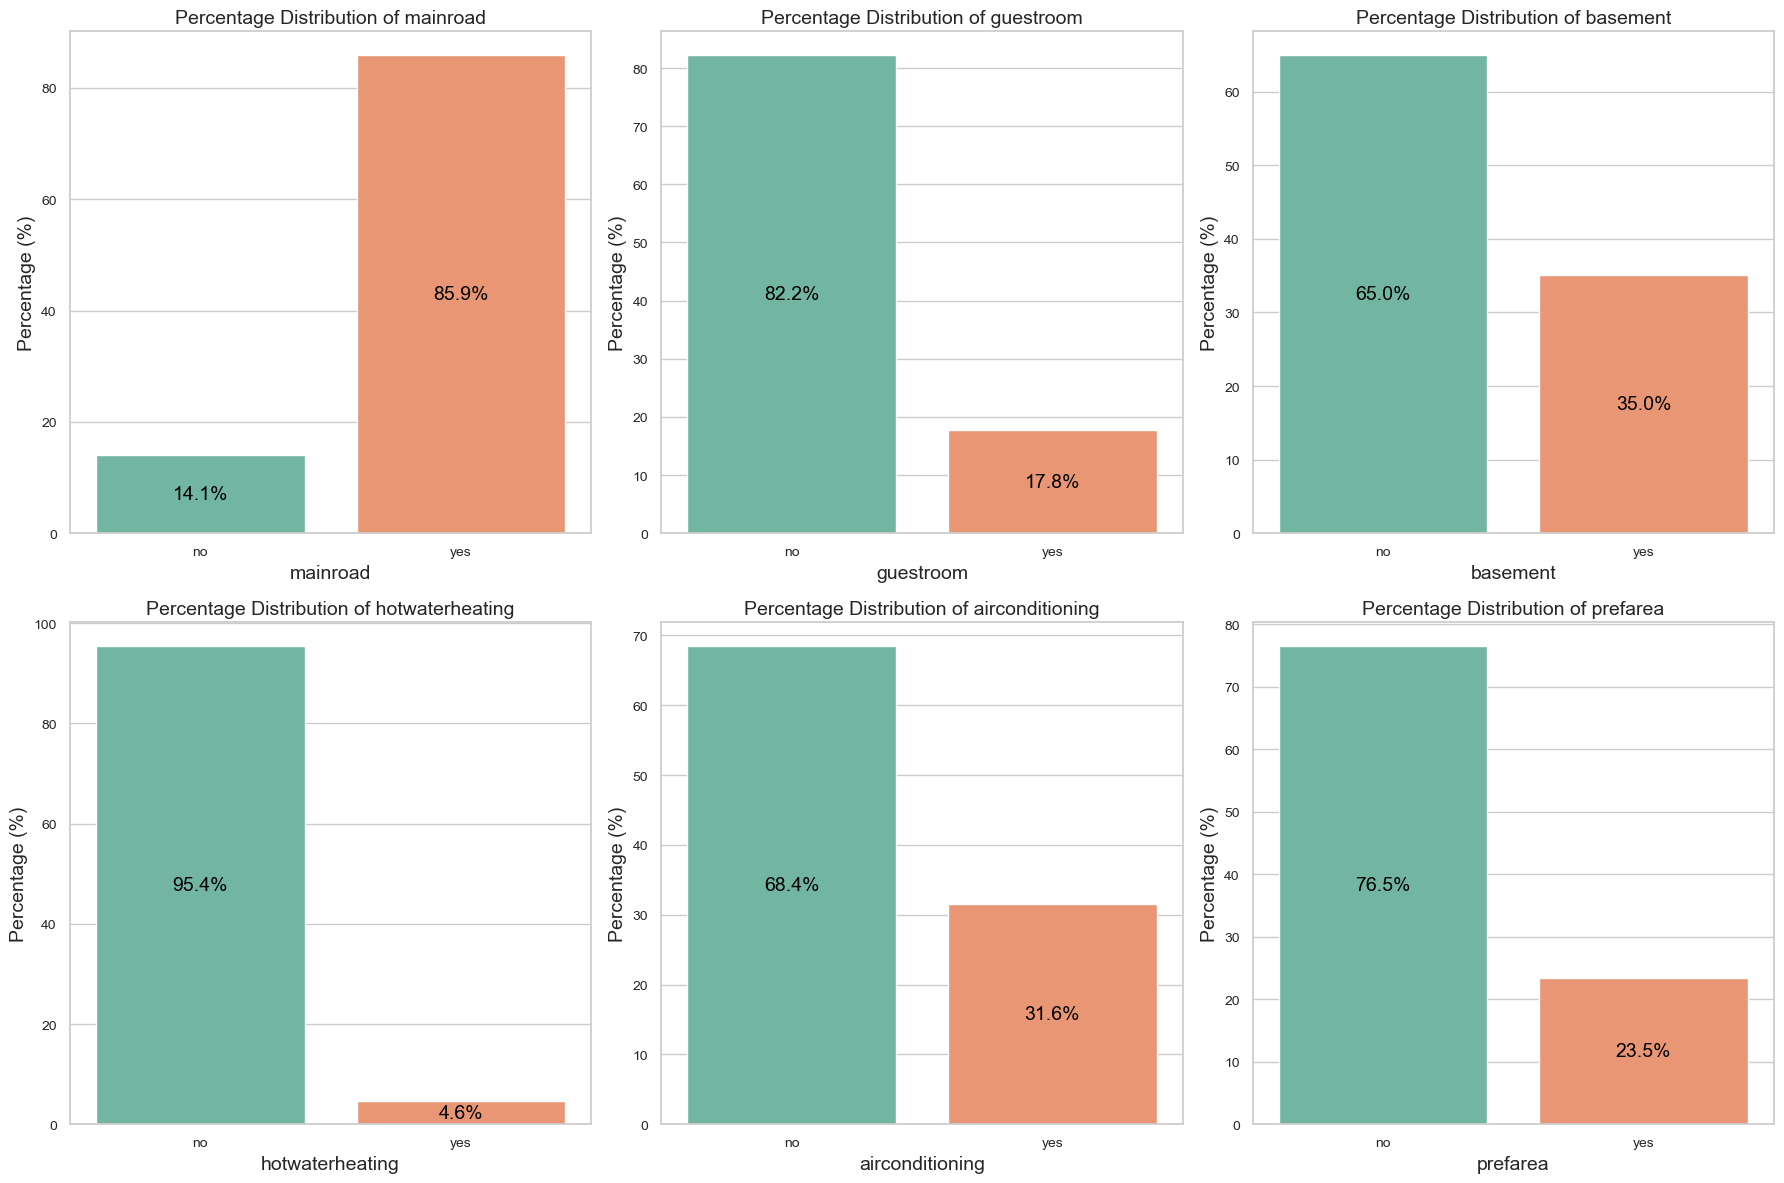

In [176]:
# List of categorical columns excluding 'furnishingstatus'
view_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Iterate through each categorical column and create a bar plot
for i, col in enumerate(view_columns, 1):
    plt.subplot(2, 3,i)  # 2x3 grid for plots
    category_counts = House_price_df[col].value_counts(normalize=True) * 100  # Calculate percentage
    ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
    plt.title(f'Percentage Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Annotate each bar with the percentage value
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=14, color='black')
save_fig('Percentage Distribution of categorical features')
plt.tight_layout()
plt.show()

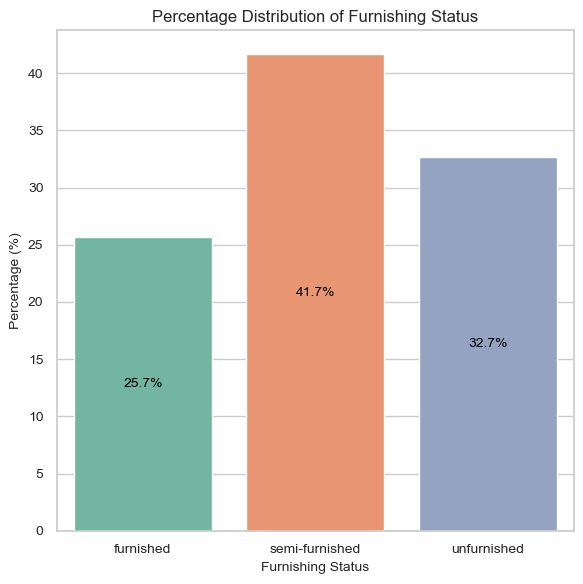

In [214]:
plt.figure(figsize=(6, 6))

# Create a bar plot for 'furnishingstatus'
category_counts = House_price_df['furnishingstatus'].value_counts(normalize=True) * 100  # Calculate percentage
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Percentage Distribution of Furnishing Status', fontsize=12)
plt.xlabel('Furnishing Status', fontsize=10)
plt.ylabel('Percentage (%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate each bar with the percentage value
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')
save_fig('Percentage Distribution of categorical features2')
plt.tight_layout()
plt.show()

The bar charts above show very skewed distributions for most of the categorical features excluding the Furnishing Status which has a relatively more balanced distribution.

The hotwater heating category shows significant skewness as as the non availability of waterheating (no) compared to its availability (yes) is at 95.4% compared to 4.6%. This would imply that the feature could be of significant importance to the models.

##### 4.2 Analysing the numerical features 

##### CORRELATION MATRIX

C:\Users\nofil\AppData\Local\Temp\ipykernel_20968\3598554553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = House_price_df.corr()


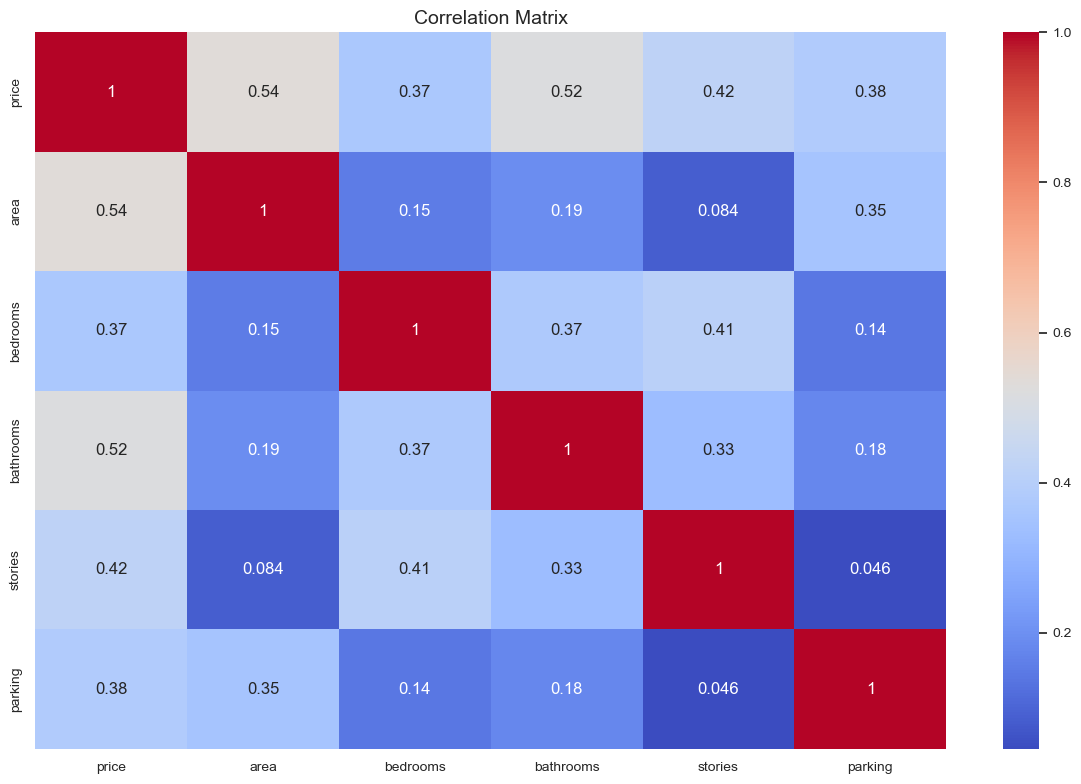

In [166]:
# Compute the correlation matrix
corr_matrix = House_price_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
save_fig(f"correlation matrix")
plt.show()

The correlation matrix provides a comprehensive view of how different variables relate to each other.The correlation coefficient (ranging from -1 to 1) indicates the strength and direction of the relationship between two variables. A value closer to 1 or -1 indicates a strong relationship, while a value closer to 0 indicates a weak relationship.

For the purpose of machine learning, we would ideally drop predictor variables that are highly correlated with each other to avoid redundancy.

However, there are no strong correlations between any of the predictor variables. Hence they will be maintained for the modelling.

The matrix however shows some relativley strong correlation between area (0.54), bathroom (0.52) and the target variable price

##### DESCRIPTIVE STATISTICS

In [9]:
print(House_price_df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


The descriptive statistics above gives an overview of the dataset in particualr reference to the numerical features, which is useful for understanding its distribution and informing preprocessing decisions. Here‚Äôs a general insight into how these statistics relate to machine learning model evaluation: 

1. Understanding the Distribution:

**Price**:

Mean: 4,766,729
Standard Deviation: 1,870,440

Range: 1,750,000 to 13,300,000

25th Percentile (Q1): 3,430,000

50th Percentile (Median): 4,340,000

75th Percentile (Q3): 5,740,000

The target variable (price) shows a wide range and a high standard deviation, indicating significant variability in home prices. The large difference between the median and the maximum suggests the presence of high-value outliers.

**Area:**

Mean: 5150.54 square feet

Standard Deviation: 2170.14 square feet

Range: 1650 to 16,200 square feet

The area of homes also has a large range and high variability, which might influence model performance if not handled properly.

**Bedrooms, Bathrooms, Stories:**

The values for bedrooms, bathrooms, and stories are more consistent, with relatively smaller standard deviations compared to price and area.

**Parking:**

Mean: 0.69

Standard Deviation: 0.86

Range: 0 to 3

The parking feature appears to have a range from no parking to multiple parking spots, with a mean value indicating that most homes have a small number of parking spots.

**VISUALISATION**

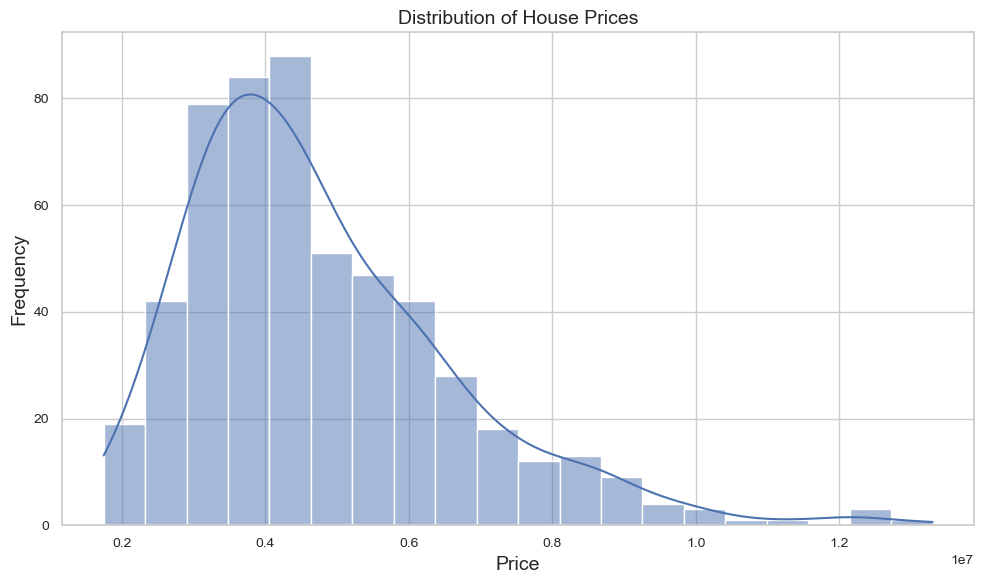

In [10]:
# Distribution of the target variable 'price'

# Function to calculate the Freedman-Diaconis bin width
def freedman_diaconis_bin_width(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(data))
    return bin_width

# Calculate the bin width for the price column
bin_width = freedman_diaconis_bin_width(House_price_df['price'])
num_bins = int((House_price_df['price'].max() - House_price_df['price'].min()) / bin_width)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(House_price_df['price'], bins=num_bins, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
save_fig("price_distribution_adjusted")
plt.show()

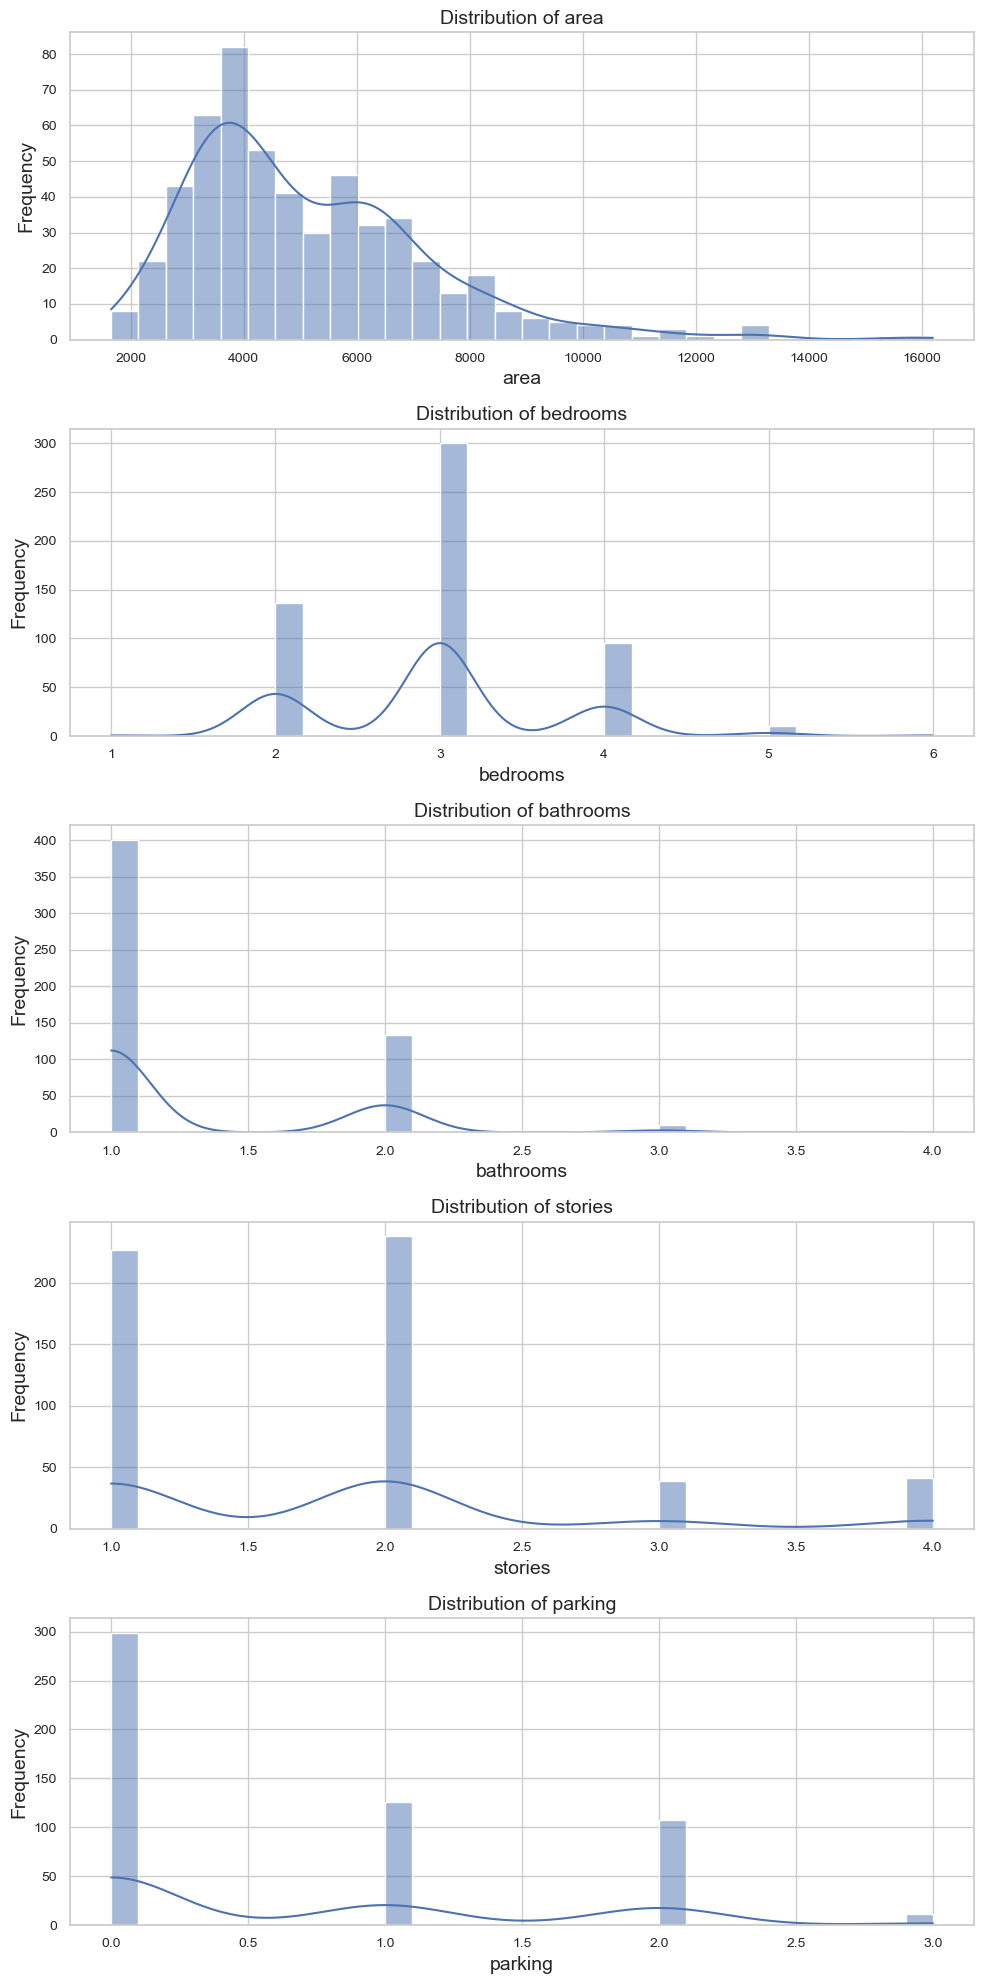

In [177]:
# Distribution of numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    sns.histplot(House_price_df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
save_fig("disribution of numerical features")
plt.tight_layout()
plt.show()

##### OUTLIERS

To understand and view the outliers mentioned above. I have used boxplot diagrammatic visualisations as seen below.
The boxplots show the outliers for the various numerical features.

In cosidering whether removing the various outliers might be beneficial:I have assumed that the outliers do not necessarily pose a threat to the model accuracy.

Removing them could result to loss of information and bias in the model such that it does not account for extreme values. 

For example in viewing the bedrooms boxplot, a mojority of the dataset lies betweeen 2 and 3 bedrooms with outliers of 5 and 6 bedrooms. Removing this outliers will mean the model is not exposed to houses with these number of bedrooms thereby loosing some key information.

As such the judgement for this project is to leave the outliers in the dataset.

**Visualisations**

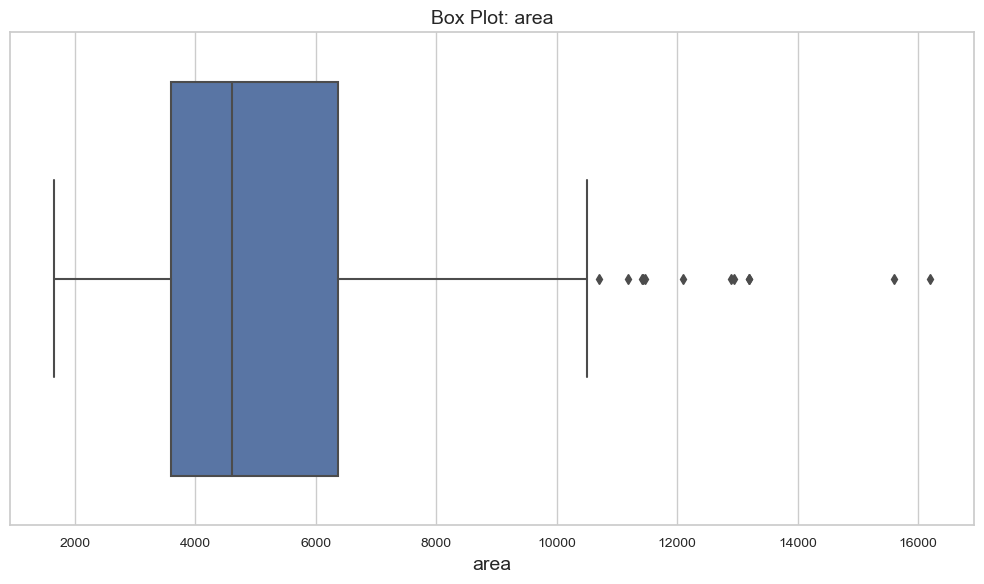

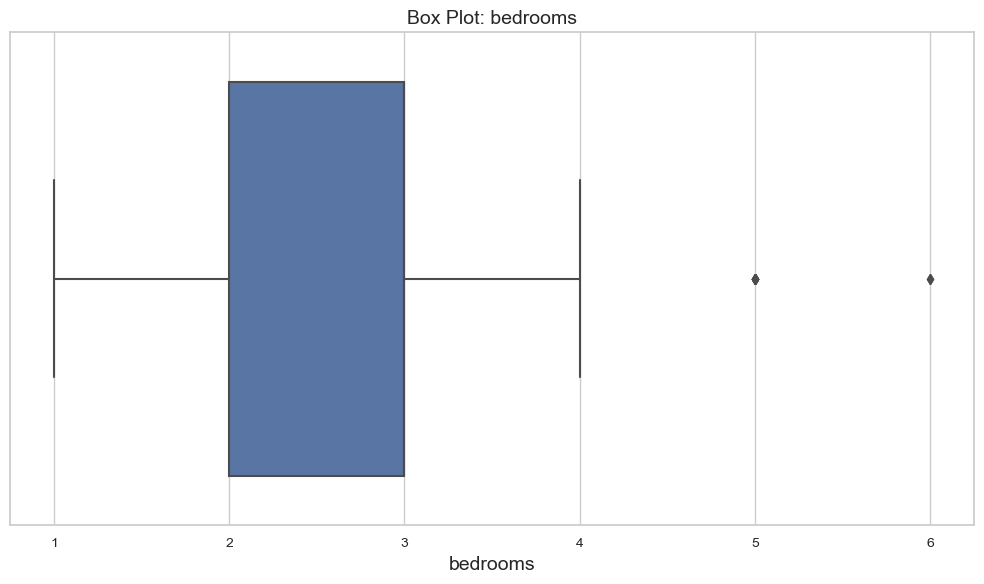

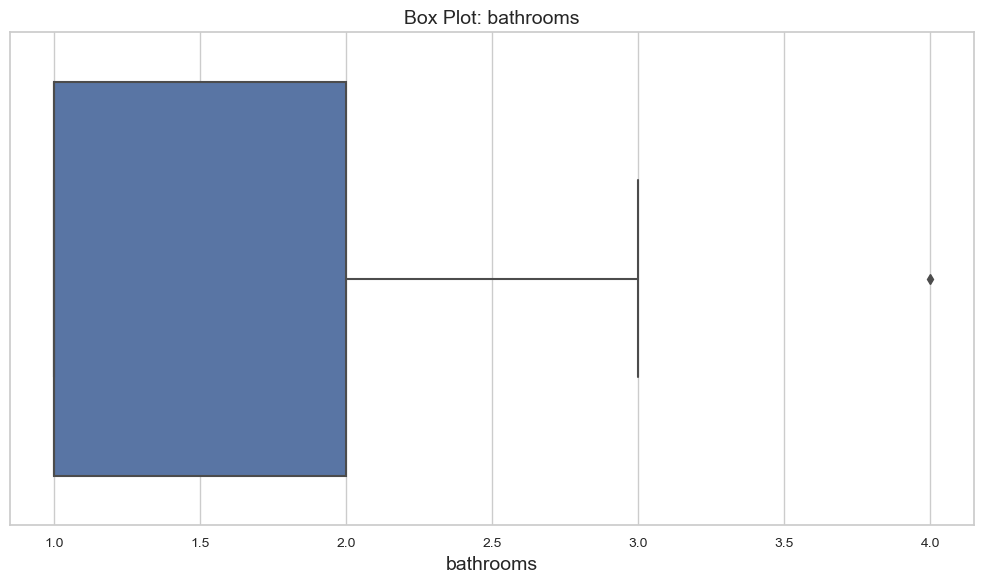

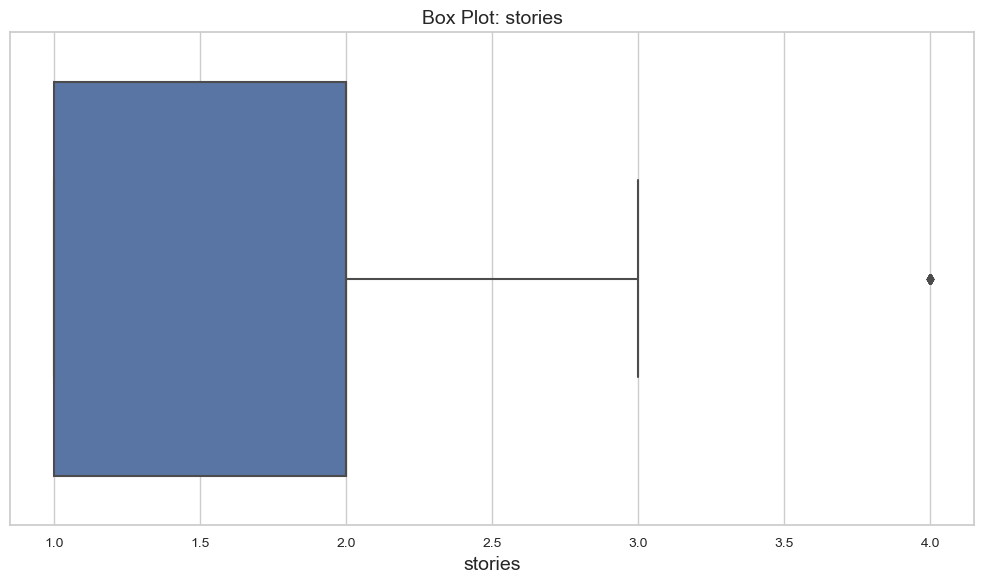

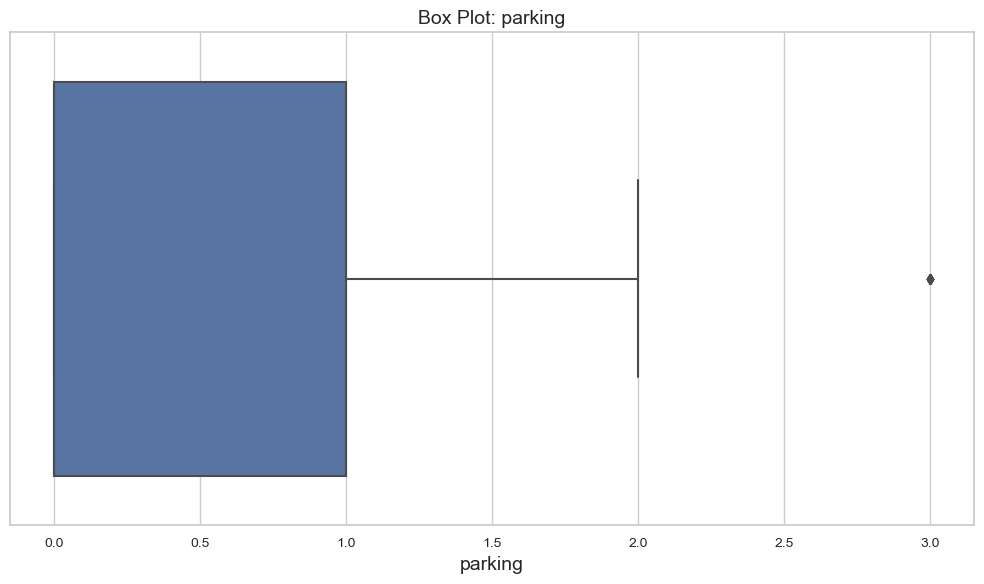

In [12]:
# Identify outliers using box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=House_price_df[feature])
    plt.title(f'Box Plot: {feature}')
    plt.xlabel(feature)
    save_fig(f"{feature}_boxplot")
    plt.show()


### 5. FEATURE ENGINEERING

Feature engineering is a crucial step in the data preparation process for machine learning. Its purpose is to create new features or modify existing ones to improve the performance of a model. Some benefits of feature engineering:

1. Enhance Model Performance: Through better predictive power and reducing overfitting.

2. Improve Interpretability: By creating meaningful features for better insights for predictions.

3. Adapt to Different Models: By creating the right type of features for the model requirements.

Examples of Feature Engineering:

Interaction Features: Creating features that represent interactions between two or more variables (e.g., multiplying two features to capture their joint effect).

Encoding Categorical Variables: Converting categorical variables into numerical formats using techniques like one-hot encoding or label encoding.

In this project, I have created and **interactive Features called FeaturesIndex**, by assigning weights (in numerical values) to the categorical features to depict a ranking of attractiveness to stakeholders. The higher the weight the more attractive the feature. The weights were then multiplied together to give a final index value. In using the created FeatureIndex in the models, the original component features were dropped to reduce the effect of redundancy and noise in the model
It is **important to note** that the weights are a subjective assignment which could create some bias for the model. However, the weights do pose a level of general acceptance.

Also, the categorical variables were encoded using the oneHotcoder tranformer to give binary numerical values which are more operable for the chosen models.
The values are 1 for 'yes' and 0 for 'no'. This is a best practice feature engineering style that is widely used.

In [13]:
#importing relevant packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**5.1 Creating the Interactive Feature**

In [112]:
# Transforming some categorical fetaures to rank in order based on assigned weight
# First create a custom copy of the House_price_df

House_price_weighted_df = House_price_df.copy()

#Next, Create/Transform some new features
House_price_weighted_df['furnishing_weight'] = 5 
House_price_weighted_df.loc[House_price_weighted_df['furnishingstatus'] == 'semi-furnished', 'furnishing_weight'] = 3
House_price_weighted_df.loc[House_price_weighted_df['furnishingstatus'] == 'unfurnished', 'furnishing_weight'] = 1

House_price_weighted_df['mainroad_weight'] = 3 
House_price_weighted_df.loc[House_price_weighted_df['mainroad'] == 'no', 'mainroad_weight'] = 1

House_price_weighted_df['guestroom_weight'] = 3 
House_price_weighted_df.loc[House_price_weighted_df['guestroom'] == 'no', 'guestroom_weight'] = 1

House_price_weighted_df['basement_weight'] = 3 
House_price_weighted_df.loc[House_price_weighted_df['basement'] == 'no', 'basement_weight'] = 1

House_price_weighted_df['hotwaterheating_weight'] = 3 
House_price_weighted_df.loc[House_price_weighted_df['hotwaterheating'] == 'no', 'hotwaterheating_weight'] = 1

House_price_weighted_df['airconditioning_weight'] = 3 
House_price_weighted_df.loc[House_price_weighted_df['airconditioning'] == 'no', 'airconditioning_weight'] = 1

House_price_weighted_df['prefarea_weight'] = 3 
House_price_weighted_df.loc[House_price_weighted_df['prefarea_weight'] == 'no', 'prefarea_weight'] = 1


#features index - combined effect of all created weights above
House_price_weighted_df['featuresIndex'] = House_price_weighted_df['furnishing_weight'] *House_price_weighted_df['mainroad_weight'] * House_price_weighted_df['guestroom_weight']*House_price_weighted_df['basement_weight']*House_price_weighted_df['hotwaterheating_weight']*House_price_weighted_df['airconditioning_weight']*House_price_weighted_df['prefarea_weight']

#final weighted dataframe. Redundant columns dropped
House_price_weighted_df = House_price_weighted_df.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','furnishing_weight','mainroad_weight','guestroom_weight','basement_weight','hotwaterheating_weight','airconditioning_weight','prefarea_weight'])

In [113]:
House_price_weighted_df

price  area  bedrooms  bathrooms  stories  parking  featuresIndex
0    13300000  7420         4          2        3        2            135
1    12250000  8960         4          4        4        3            135
2    12250000  9960         3          2        2        2             81
3    12215000  7500         4          2        2        3            405
4    11410000  7420         4          1        2        2           1215
..        ...   ...       ...        ...      ...      ...            ...
540   1820000  3000         2          1        1        2             27
541   1767150  2400         3          1        1        0              9
542   1750000  3620         2          1        1        0              9
543   1750000  2910         3          1        1        0             15
544   1750000  3850         3          1        2        0              9

[545 rows x 7 columns]

**5.2 Encoding the categorical variables**

In [117]:
#First - define categorical and numerical variables
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = [col for col in House_price_df.columns if col not in categorical_features]
numerical_features_2 = [col for col in House_price_df.columns if col not in categorical_features] 

# Define the transformer for categorical data
categorical_transformer = OneHotEncoder(sparse=False, drop='first')  # drop='first' to handle dummy variable trap

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'  # Keep other features (i.e., numerical ones) unchanged
)

In [118]:
# Apply the transformation
transformed_data = preprocessor.fit_transform(House_price_df)

# Get the transformed feature names
transformed_feature_names = preprocessor.get_feature_names_out()

# Directly update column names
transformed_feature_names = [col.replace('remainder__', '') for col in transformed_feature_names]


# Convert back to a DataFrame
House_price_transformed_df = pd.DataFrame(transformed_data, columns=transformed_feature_names)

C:\Users\nofil\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
# Add the target variable back to the DataFrame
House_price_transformed_df['price'] = House_price_df['price'].values

In [120]:
House_price_transformed_df

cat__mainroad_yes  cat__guestroom_yes  cat__basement_yes  \
0                  1.0                 0.0                0.0   
1                  1.0                 0.0                0.0   
2                  1.0                 0.0                1.0   
3                  1.0                 0.0                1.0   
4                  1.0                 1.0                1.0   
..                 ...                 ...                ...   
540                1.0                 0.0                1.0   
541                0.0                 0.0                0.0   
542                1.0                 0.0                0.0   
543                0.0                 0.0                0.0   
544                1.0                 0.0                0.0   

     cat__hotwaterheating_yes  cat__airconditioning_yes  cat__prefarea_yes  \
0                         0.0                       1.0                1.0   
1                         0.0                       1.0                0.0   
2                         0.0                       0.0                1.0   
3                         0.0                       1.0                1.0   
4                         0.0                       1.0                0.0   
..                        ...                       ...                ...   
540                       0.0                       0.0                0.0   
541                       0.0                       0.0                0.0   
542                       0.0                       0.0                0.0   
543                       0.0                       0.0                0.0   
544                       0.0                       0.0                0.0   

     cat__furnishingstatus_semi-furnished  cat__furnishingstatus_unfurnished  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     1.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
..                                    ...                                ...   
540                                   0.0                                1.0   
541                                   1.0                                0.0   
542                                   0.0                                1.0   
543                                   0.0                                0.0   
544                                   0.0                                1.0   

        price    area  bedrooms  bathrooms  stories  parking  
0    13300000  7420.0       4.0        2.0      3.0      2.0  
1    12250000  8960.0       4.0        4.0      4.0      3.0  
2    12250000  9960.0       3.0        2.0      2.0      2.0  
3    12215000  7500.0       4.0        2.0      2.0      3.0  
4    11410000  7420.0       4.0        1.0      2.0      2.0  
..        ...     ...       ...        ...      ...      ...  
540   1820000  3000.0       2.0        1.0      1.0      2.0  
541   1767150  2400.0       3.0        1.0      1.0      0.0  
542   1750000  3620.0       2.0        1.0      1.0      0.0  
543   1750000  2910.0       3.0        1.0      1.0      0.0  
544   1750000  3850.0       3.0        1.0      2.0      0.0  

[545 rows x 14 columns]

**5.3 Scaling**

When it comes to preparing numerical features for machine learning models, scaling can be very important. 

Why Scale Features?

Equal Weighting: Many machine learning algorithms  perform better when features are on a similar scale. This is because the scale of the features affects the distance calculations and optimization algorithms.

Convergence: Scaling can help algorithms converge faster during training, especially for algorithms that rely on gradient-based optimization.

Comparison: For models that combine features linearly, like linear regression, features with larger ranges can dominate the learning process. Scaling ensures that all features contribute equally.

Common methods for scaling:

**Standardization (Z-score Normalization):**

Converts features to have a mean of 0 and a standard deviation of 1.
Formula:
scaled_value
=
ùë•
‚àí
mean/
std_dev

Suitable when features have different units or vastly different ranges.

**Min-Max Scaling (Normalization):**

Scales features to a fixed range, typically [0, 1].
Formula: 
scaled_value
=
ùë•
‚àí
min/
max
‚àí
min
‚Äã
 
Suitable when you need features in a specific range.

To assess the need for scaling in this case, we look at the numerical features characteristics

**Area:** Also has a large range, so scaling is beneficial.

**Bedrooms, Bathrooms, Stories, Parking:** These are likely on a smaller scale but still benefit from scaling to ensure all features are on similar footing.

**FeaturesIndex:** Also a derived feature and  scaling is also beneficial here.


**Important Note**

Standardization scaling is chosen for the project as the features have vastly different ranges

The target variable price is not scaled as this could affect the models performance. This is best practice

In [122]:
# Standardize numerical features 
scaler = StandardScaler()
numerical_columns = [col for col in numerical_features_2]
House_price_transformed_df_copy = House_price_transformed_df
House_price_scaled_df = House_price_transformed_df_copy
House_price_scaled_df[numerical_columns] = scaler.fit_transform(House_price_scaled_df[numerical_columns])

**Scaling Part 1**

We scale the numerical features to create a dataframe  that does not include the engineered interactive feature - featuresIndex

In [123]:
# Step 1: Separate the 'price' column
price_column = House_price_df['price']

# Step 2: Drop the 'price' column from the columns to be scaled
numerical_columns_to_scale = [col for col in numerical_columns if col != 'price']

# Step 3: Scale the selected numerical columns
House_price_scaled_df[numerical_columns_to_scale] = scaler.fit_transform(House_price_scaled_df[numerical_columns_to_scale])

# Step 4: Add the 'price' column back to the DataFrame
House_price_scaled_df['price'] = price_column

# Check the result
House_price_scaled_df.head()

cat__mainroad_yes  cat__guestroom_yes  cat__basement_yes  \
0                1.0                 0.0                0.0   
1                1.0                 0.0                0.0   
2                1.0                 0.0                1.0   
3                1.0                 0.0                1.0   
4                1.0                 1.0                1.0   

   cat__hotwaterheating_yes  cat__airconditioning_yes  cat__prefarea_yes  \
0                       0.0                       1.0                1.0   
1                       0.0                       1.0                0.0   
2                       0.0                       0.0                1.0   
3                       0.0                       1.0                1.0   
4                       0.0                       1.0                0.0   

   cat__furnishingstatus_semi-furnished  cat__furnishingstatus_unfurnished  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   1.0                                0.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   

      price      area  bedrooms  bathrooms   stories   parking  
0  13300000  1.046726  1.403419   1.421812  1.378217  1.517692  
1  12250000  1.757010  1.403419   5.405809  2.532024  2.679409  
2  12250000  2.218232  0.047278   1.421812  0.224410  1.517692  
3  12215000  1.083624  1.403419   1.421812  0.224410  2.679409  
4  11410000  1.046726  1.403419  -0.570187  0.224410  1.517692

**Scaling Part 2**

We scale the numerical features to create a dataframe  that includes the engineered interactive feature - featuresIndex

In [124]:
# Step 1: Separate the 'price' column
price_column2 = House_price_df['price']

# Step 2: Drop the 'price' column and scale the remaining features
features_to_scale = House_price_weighted_df.drop(columns=['price'])
scaled_features = pd.DataFrame(scaler.fit_transform(features_to_scale), columns=features_to_scale.columns)

# Step 3: Add the 'price' column back to the scaled DataFrame
House_price_weighted_scaled_df = pd.concat([price_column2.reset_index(drop=True), scaled_features], axis=1)

# Check the result
House_price_weighted_scaled_df.head()

price      area  bedrooms  bathrooms   stories   parking  featuresIndex
0  13300000  1.046726  1.403419   1.421812  1.378217  1.517692       0.044620
1  12250000  1.757010  1.403419   5.405809  2.532024  2.679409       0.044620
2  12250000  2.218232  0.047278   1.421812  0.224410  1.517692      -0.209869
3  12215000  1.083624  1.403419   1.421812  0.224410  2.679409       1.317066
4  11410000  1.046726  1.403419  -0.570187  0.224410  1.517692       5.134403

### 6. Model Training and Evaluation

Employing a strategy of first establishing a baseline model before incorporating feature scaling and the engineered features:

To develop the machine learning model four models are evaluated based on three broad scenarios.

The four models specifically are Linear regression, Decision Tree, Random Forest and Gradient Boosting Technique.
The broad scenarios include;

   Scenario 1. Baseline: Here, categorical variables were encoded to enable effective machine learning operations. No further                  manipulations were done on all other variables (i.e numerical variables)
    
   Scenario 2. Scaled  : In addition to the encoded categorical variables,  the numerical predictors (i.e excluding the target                  varibale 'price') where scaled before applying the model valuations
   
   Scenario 3. Scaled Engineered Features: In this scenario, the categorical features were given subjective weightings to create                a value ranking. These weightings were then multiplied to create a new feature -featuresIndex. All redundant                    predictor features were then dropped and the remaining were scaled before applying the model valuations.
   
For each sceanrio, the 4 models were evaluated in two steps;
    Without hyperparameter tuning
    With hyperparameter tuning (Grid Search CV)
    

#### Choose and Justify the Selection of Machine Learning Algorithms


Linear Regression: A simple and interpretable model.

Decision Tree: Captures non-linear relationships.

Random Forest: An ensemble method that improves performance and reduces overfitting.

Gradient Boosting: Another powerful ensemble method that often yields strong performance.

###### 6.1 Model Training and Evaluation Scenario 1

##### Split the Dataset into Training and Testing Sets

In [125]:
#import relevant function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [126]:
# Splitting the dataset into training and testing sets
X = House_price_transformed_df_copy.drop(columns=['price'])
y = House_price_transformed_df_copy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #which means 80% of data will be for training and 20% for testing

#### Train Multiple Models and Evaluate Their Performance - No hyperparameter tuning

In [127]:
#Import relevant packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [128]:
# Initialize models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
gboost_reg = GradientBoostingRegressor(random_state=42)

In [129]:
#define a function that evaluates the model 
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [130]:
# Evaluate all models
# The models are evaluated on three key metrics - Mean Square Error (MSE), Mean Absolute Error (MAE) and R^2
# The ideal model should have high R^2 coeeficient and low MSE and MAE

models = [lin_reg, tree_reg, forest_reg, gboost_reg]
for model in models:
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R^2: {r2:.2f}")

Model: LinearRegression
  MSE: 1754318687330.67
  MAE: 970043.40
  R^2: 0.65
Model: DecisionTreeRegressor
  MSE: 2640105389908.26
  MAE: 1193981.65
  R^2: 0.48
Model: RandomForestRegressor
  MSE: 1951950918962.11
  MAE: 1015154.92
  R^2: 0.61
Model: GradientBoostingRegressor
  MSE: 1691450229769.94
  MAE: 961996.11
  R^2: 0.67


#### Hyper parameter Tuning - Grid Search Method

 Hyperparameter tuning is essential to optimize the performance of the machine learning models. 
 
 It is the process of finding the optimal set of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data but are set before the training process begins. They control the behavior of the training algorithm and, consequently, the performance of the model.
 
Grid Search:

A method where a predefined set of hyperparameters is specified, and the model is trained and evaluated for each combination. It has the advantage of being an  exhaustive operation but can be computationally expensive.

The Grid Search makes use of certain characterisations which are 

Folds: This refers to number of X cross-validation, a method where the data is split into  equal X parts (or folds). The model is tested on one part and trained on the remaininh. This process is repeated X times, with each fold used as the test set once.

Candidates: This indicates  different values of the hyperparameter that the gris search was evaluating.

Fits: Indicates the number of times the model was trained and evaluated in total ( candidates √ó folds).

Best parameter: The parameter associated with the best performing model.

Best Score: This is the score ( which has been set as  Mean Squared Error) associated with the best-performing model, using the best parameter. If the score appears to be quite low, it would generally indicate better performance and vice versa.

Linear Regression doesn‚Äôt have many hyperparameters, but I have chosen to tune base on Lasso and Ridge Regulators

Decision Tree Regressor has several hyperparameters to tune, such as max_depth, min_samples_split, and min_samples_leaf.

Random Forest Regressor has hyperparameters such as n_estimators, max_features, max_depth, and min_samples_split.

Gradient Boosting Regressor can be tuned with parameters like n_estimators, learning_rate, max_depth, and subsample.

In [131]:
#import relevant package

from sklearn.linear_model import Ridge


# Define parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

# Initialize GridSearchCV
ridge_grid_search = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

print(f"Best parameters for Ridge Regression: {ridge_grid_search.best_params_}")
print(f"Best score for Ridge Regression: {-ridge_grid_search.best_score_:.2f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Ridge Regression: {'alpha': 10}
Best score for Ridge Regression: 1060197046850.92


In [132]:
#import relevant package

from sklearn.linear_model import Lasso
lasso = Lasso()


# Define parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)
# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'alpha': 100}
Best score: -1062639116767.0222


In [133]:
#Decision Tree 
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree Regressor
param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

print(f"Best parameters for Decision Tree Regressor: {tree_grid_search.best_params_}")
print(f"Best score for Decision Tree Regressor: {-tree_grid_search.best_score_:.2f}")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters for Decision Tree Regressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Decision Tree Regressor: 1553555555513.95


In [134]:
#Random Forest
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Regressor
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
forest_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_forest, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
forest_grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest Regressor: {forest_grid_search.best_params_}")
print(f"Best score for Random Forest Regressor: {-forest_grid_search.best_score_:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for Random Forest Regressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest Regressor: 1074935565792.84


In [135]:
#Gradient Boosting
# Define parameter grid for Gradient Boosting Regressor
param_grid_gboost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
gboost_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gboost, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
gboost_grid_search.fit(X_train, y_train)

print(f"Best parameters for Gradient Boosting Regressor: {gboost_grid_search.best_params_}")
print(f"Best score for Gradient Boosting Regressor: {-gboost_grid_search.best_score_:.2f}")

best_gboost = gboost_grid_search.best_estimator_
y_pred = best_gboost.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score for Gradient Boosting Regressor: 1183990659196.69
Test MSE: 1916988380371.12


#### Choosing the best Model on the Test Set (Based on Model Training and Evaluation Part 1)

How This Code Works:

**Baseline Models Section**:
The code first evaluates and prints the performance metrics for the baseline models (LinearRegression, DecisionTreeRegressor, etc.).

**Tuned Models Section**:
Next, it evaluates and prints the performance metrics for the hyperparameter-tuned models, clearly indicating that these are the tuned versions.

**Best Model Selection**:
The code then iterates over all the models (both baseline and tuned) to find the one with the highest R¬≤ value. If multiple models have the same R¬≤, it will choose the one with the lowest MSE and MAE.

**Best Model Performance**:
Finally, it prints out the performance of the best model according to the evaluation criteria.

**Output**:
 This approach ensures that you can easily compare the results and determine which model works best for your dataset.

In [136]:
# Define baseline models
baseline_models = [lin_reg, tree_reg, forest_reg, gboost_reg]

# Define tuned models (using the best estimators from GridSearchCV or other tuning methods)
tuned_models = [grid_search.best_estimator_, ridge_grid_search.best_estimator_,
                gboost_grid_search.best_estimator_, forest_grid_search.best_estimator_, 
                tree_grid_search.best_estimator_]

# Evaluate baseline models
print("Baseline Models:")
for model in baseline_models:
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R^2: {r2:.2f}")

# Evaluate tuned models
print("\nTuned Models:")
for model in tuned_models:
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {model.__class__.__name__} (Tuned)")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R^2: {r2:.2f}")

# Finding the best model based on R^2 and MSE/MAE
best_model = None
best_r2 = -float('inf')
lowest_mse = float('inf')
lowest_mae = float('inf')

all_models = baseline_models + tuned_models
for model in all_models:
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    # Update best model based on R^2 and MSE/MAE criteria
    if r2 > best_r2 or (r2 == best_r2 and mse < lowest_mse and mae < lowest_mae):
        best_model = model
        best_r2 = r2
        lowest_mse = mse
        lowest_mae = mae

# Print the best model's performance
print("\nBest Model Performance on Testing Set:")
print(f"Model: {best_model.__class__.__name__}")
print(f"  MSE: {lowest_mse:.2f}")
print(f"  MAE: {lowest_mae:.2f}")
print(f"  R^2: {best_r2:.2f}")

Baseline Models:
Model: LinearRegression
  MSE: 1754318687330.67
  MAE: 970043.40
  R^2: 0.65
Model: DecisionTreeRegressor
  MSE: 2640105389908.26
  MAE: 1193981.65
  R^2: 0.48
Model: RandomForestRegressor
  MSE: 1951950918962.11
  MAE: 1015154.92
  R^2: 0.61
Model: GradientBoostingRegressor
  MSE: 1691450229769.94
  MAE: 961996.11
  R^2: 0.67

Tuned Models:
Model: Lasso (Tuned)
  MSE: 1754633882575.00
  MAE: 970109.84
  R^2: 0.65
Model: Ridge (Tuned)
  MSE: 1791426955344.19
  MAE: 979349.92
  R^2: 0.65
Model: GradientBoostingRegressor (Tuned)
  MSE: 1916988380371.12
  MAE: 1003856.90
  R^2: 0.62
Model: RandomForestRegressor (Tuned)
  MSE: 2019761861784.46
  MAE: 1022084.72
  R^2: 0.60
Model: DecisionTreeRegressor (Tuned)
  MSE: 2577632942727.54
  MAE: 1180740.43
  R^2: 0.49

Best Model Performance on Testing Set:
Model: GradientBoostingRegressor
  MSE: 1691450229769.94
  MAE: 961996.11
  R^2: 0.67


###### Model Training and Evaluation - Scenario 2

Repeating same process as Part 1 but this time, using the 
**House_price_scaled_df** 

In [137]:
# Assuming 'price' is the target variable
X_scaled = House_price_scaled_df.drop(columns=['price'])
y_scaled = House_price_scaled_df['price']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [138]:
# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(random_state=42)
lasso_reg = Lasso(random_state=42)
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
gboost_reg = GradientBoostingRegressor(random_state=42)

In [139]:
# List of models to evaluate
models2 = [lin_reg, ridge_reg, lasso_reg, tree_reg, forest_reg, gboost_reg]

In [140]:
# Evaluate all models
for model in models2:
    mse, mae, r2 = evaluate_model(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
    print(f"Model: {model.__class__.__name__}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R^2: {r2:.2f}")

Model: LinearRegression
  MSE: 1754318687330.67
  MAE: 970043.40
  R^2: 0.65
Model: Ridge
  MSE: 1758466185268.18
  MAE: 971333.46
  R^2: 0.65
Model: Lasso
  MSE: 1754321840972.79
  MAE: 970044.08
  R^2: 0.65
Model: DecisionTreeRegressor
  MSE: 2640105389908.26
  MAE: 1193981.65
  R^2: 0.48
Model: RandomForestRegressor
  MSE: 1951950918962.11
  MAE: 1015154.92
  R^2: 0.61
Model: GradientBoostingRegressor
  MSE: 1691450229769.94
  MAE: 961996.11
  R^2: 0.67


#### Perform Hyperparameter Tuning to Optimize the Model's Performance  -Scenario 2

In [141]:
# Define parameter grids
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
gboost_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]}
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [142]:
# Perform GridSearchCV for each model
ridge_grid_search = GridSearchCV(Ridge(random_state=42), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(Lasso(random_state=42), lasso_params, cv=5, scoring='neg_mean_squared_error')
gboost_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_params, cv=5, scoring='neg_mean_squared_error')
tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
forest_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_forest, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)





In [143]:
#fit the models
ridge_grid_search.fit(X_train_scaled, y_train_scaled)
lasso_grid_search.fit(X_train_scaled, y_train_scaled)
gboost_grid_search.fit(X_train_scaled, y_train_scaled)
tree_grid_search.fit(X_train_scaled, y_train_scaled)
forest_grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [144]:
# Print the best parameters and scores
print("Best parameters for Ridge: ", ridge_grid_search.best_params_)
print("Best score for Ridge: ", -ridge_grid_search.best_score_)

print("Best parameters for Lasso: ", lasso_grid_search.best_params_)
print("Best score for Lasso: ", -lasso_grid_search.best_score_)

print("Best parameters for Gradient Boosting: ", gboost_grid_search.best_params_)
print("Best score for Gradient Boosting: ", -gboost_grid_search.best_score_)

print("Best parameters for Gradient Boosting: ", tree_grid_search.best_params_)
print("Best score for Gradient Boosting: ", -tree_grid_search.best_score_)

print("Best parameters for Gradient Boosting: ", forest_grid_search.best_params_)
print("Best score for Gradient Boosting: ", -forest_grid_search.best_score_)






Best parameters for Ridge:  {'alpha': 10.0}
Best score for Ridge:  1060197046850.9183
Best parameters for Lasso:  {'alpha': 10.0}
Best score for Lasso:  1062639653930.958
Best parameters for Gradient Boosting:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score for Gradient Boosting:  1183990659196.685
Best parameters for Gradient Boosting:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Gradient Boosting:  1553555555513.9517
Best parameters for Gradient Boosting:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Gradient Boosting:  1074935565792.8438


In [145]:
for model in all_models:
    mse, mae, r2 = evaluate_model(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
    # Update best model based on R^2 and MSE/MAE criteria
    if r2 > best_r2 or (r2 == best_r2 and mse < lowest_mse and mae < lowest_mae):
        best_model = model
        best_r2 = r2
        lowest_mse = mse
        lowest_mae = mae

# Print the best model's performance
print("\nBest Model Performance on Testing Set:")
print(f"Model: {best_model.__class__.__name__}")
print(f"  MSE: {lowest_mse:.2f}")
print(f"  MAE: {lowest_mae:.2f}")
print(f"  R^2: {best_r2:.2f}")


Best Model Performance on Testing Set:
Model: GradientBoostingRegressor
  MSE: 1691450229769.94
  MAE: 961996.11
  R^2: 0.67


#### Model Training and Evaluation - Scenario 3


Repeating same process as Part 1 but this time, using the House_price_weighted_scaled_df

In [146]:
# Assuming 'price' is the target variable
X_weighted_scaled = House_price_weighted_scaled_df.drop(columns=['price'])
y_weighted_scaled = House_price_weighted_scaled_df['price']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train_weighted_scaled, X_test_weighted_scaled, y_train_weighted_scaled, y_test_weighted_scaled = train_test_split(X_weighted_scaled, y_weighted_scaled, test_size=0.2, random_state=42)

In [147]:
# Evaluate all models
for model in models2:
    mse, mae, r2 = evaluate_model(model, X_train_weighted_scaled, y_train_weighted_scaled, X_test_weighted_scaled,y_test_weighted_scaled)
    print(f"Model: {model.__class__.__name__}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R^2: {r2:.2f}")

Model: LinearRegression
  MSE: 2026653678542.52
  MAE: 1035657.33
  R^2: 0.60
Model: Ridge
  MSE: 2027688650889.98
  MAE: 1035856.88
  R^2: 0.60
Model: Lasso
  MSE: 2026654521627.79
  MAE: 1035657.44
  R^2: 0.60
Model: DecisionTreeRegressor
  MSE: 2587458824518.35
  MAE: 1158663.76
  R^2: 0.49
Model: RandomForestRegressor
  MSE: 1973982574372.00
  MAE: 996355.31
  R^2: 0.61
Model: GradientBoostingRegressor
  MSE: 1891048539673.79
  MAE: 985920.40
  R^2: 0.63


#### Perform Hyperparameter Tuning to Optimize the Model's Performance  - Scenario 3


In [148]:
#fit the models
ridge_grid_search.fit(X_train_weighted_scaled, y_train_weighted_scaled)
lasso_grid_search.fit(X_train_weighted_scaled, y_train_weighted_scaled)
gboost_grid_search.fit(X_train_weighted_scaled, y_train_weighted_scaled)
tree_grid_search.fit(X_train_weighted_scaled, y_train_weighted_scaled)
forest_grid_search.fit(X_train_weighted_scaled, y_train_weighted_scaled)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [48]:
#finding the best model

for model in all_models:
    mse, mae, r2 = evaluate_model(model,X_train_weighted_scaled, y_train_weighted_scaled, X_test_weighted_scaled, y_test_weighted_scaled)
    # Update best model based on R^2 and MSE/MAE criteria
    if r2 > best_r2 or (r2 == best_r2 and mse < lowest_mse and mae < lowest_mae):
        best_model = model
        best_r2 = r2
        lowest_mse = mse
        lowest_mae = mae

# Print the best model's performance
print("\nBest Model Performance on Testing Set:")
print(f"Model: {best_model.__class__.__name__}")
print(f"  MSE: {lowest_mse:.2f}")
print(f"  MAE: {lowest_mae:.2f}")
print(f"  R^2: {best_r2:.2f}")


Best Model Performance on Testing Set:
Model: GradientBoostingRegressor
  MSE: 1691450229769.94
  MAE: 961996.11
  R^2: 0.67


###  7. MODEL INTERPREATION AND REPORTING


7.1: Interpret the Results of the Best-Performing Model

Objective:

To understand the influence of different features on the target variable (house prices) and interpret the results from the best-performing model.

The best-performing model identified in this project is the Gradient Boosting Regressor. It has relatively higher R^2 and lower MSE and MAE compared to other models evaluated.

**Model Performance:**

Mean Squared Error (MSE): 1,691,450,229,769.94

Mean Absolute Error (MAE): 961,996.11

R-Squared (R¬≤): 0.67

**Interpretation:**

R-Squared (R¬≤ = 0.67):

The R¬≤ value indicates that approximately 67% of the variance in the house prices can be explained by the model. This suggests that the model captures a significant portion of the factors influencing house prices but still leaves room for improvement. An R¬≤ of 0.67 is generally considered moderate, meaning the model has a reasonable level of explanatory power, but there are likely other factors or interactions between features that the model does not fully capture.

**Mean Squared Error (MSE = 1,691,450,229,769.94):**

The MSE measures the average squared difference between the actual house prices and the predicted prices. A high MSE value, as observed here, indicates that there are still substantial errors in the model‚Äôs predictions. This suggests that while the model performs reasonably well, the absolute scale of the errors is quite large, which is likely due to the wide range of house prices and possibly the presence of outliers or high variance in the data.


**Mean Absolute Error (MAE = 961,996.11):

The MAE represents the average absolute difference between the predicted and actual house prices. The MAE of 961,996.11 means that, on average, the model's predictions are off by about $961,996. This is a significant error margin, especially in the context of house prices, and suggests that while the model captures trends, it might struggle with precise predictions, particularly for very high or low-priced properties.

**Feature Importance:**

In Gradient Boosting models, feature importance can be derived from the contribution of each feature to reducing the loss function across all trees in the ensemble. The more a feature contributes to splitting the data and reducing the model‚Äôs error, the more important it is considered.

To interpret the influence of individual features on house prices, we can analyze the feature importance scores provided by the model. Features with higher importance scores have a more substantial impact on the predictions. This analysis helps identify which factors are the most influential in determining house prices. Understanding feature importance can guide stakeholders in focusing on the most impactful variables when evaluating or setting house prices.

Looking at a graphical depiction of the important features across the three scenarios, the results is that;

mainroad feature is important for scenarios 1 and 2 while,
featureIndex is important for scenario 3.

Recalling that the featuresIndex is a subjective creation of the Data Scientist, the project will assume mainroad feature as the most important feature in determining house prices.

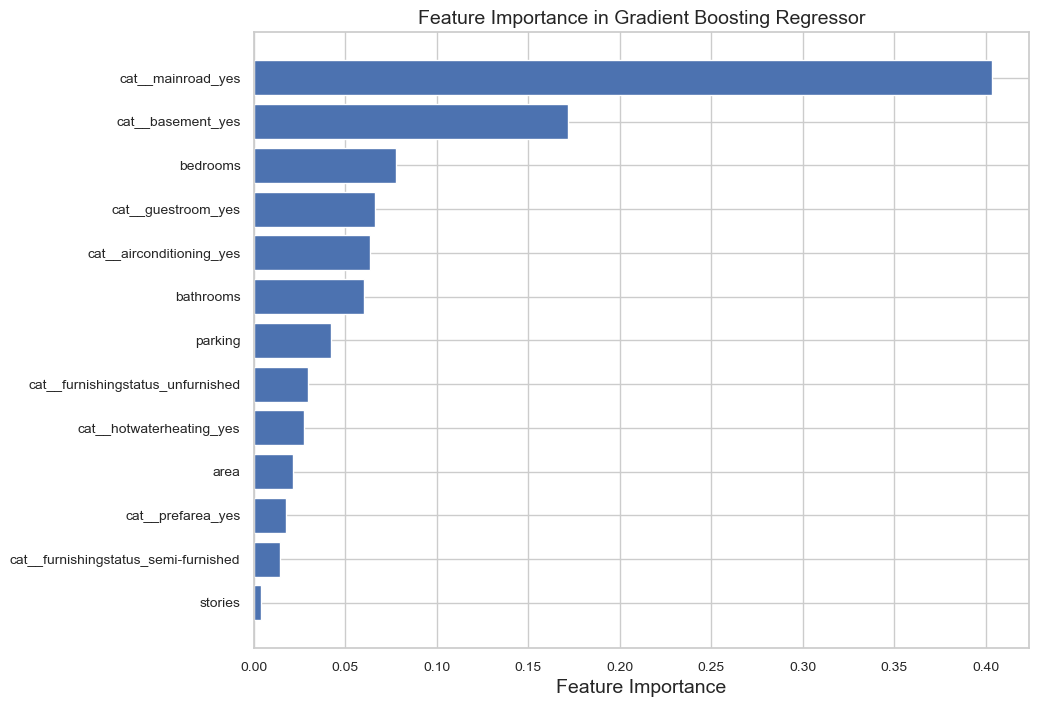

In [208]:
#SCENARIO 1
# Assign best_model as Gradient Boosting model
best_model = gboost_reg 

# Extract feature importances from the model
feature_importances = best_model.feature_importances_

# Sort the feature importances and get the sorted indices
sorted_indices = feature_importances.argsort()

# Retrieve the feature names, assuming House_price_weighted_scaled_df has the original feature names
feature_names = House_price_scaled_df.drop(columns=['price']).columns

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.show()

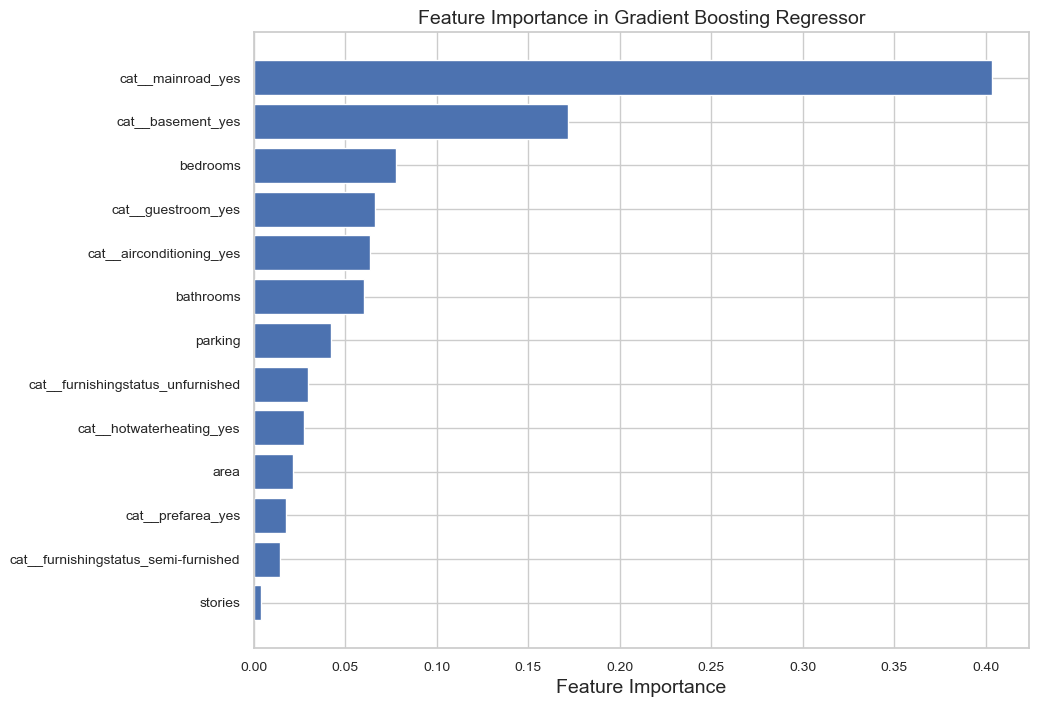

In [209]:
#SCENARIO 2
# Assuming best_model is your Gradient Boosting model
best_model = gboost_reg 

# Extract feature importances from the model
feature_importances = best_model.feature_importances_

# Sort the feature importances and get the sorted indices
sorted_indices = feature_importances.argsort()

# Retrieve the feature names, assuming House_price_weighted_scaled_df has the original feature names
feature_names = House_price_transformed_df_copy.drop(columns=['price']).columns

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.show()

In [ ]:
#SCENARIO 3
# Assuming best_model is your Gradient Boosting model
best_model = gboost_grid_search.best_estimator_  

# Extract feature importances from the model
feature_importances = best_model.feature_importances_

# Sort the feature importances and get the sorted indices
sorted_indices = feature_importances.argsort()

# Retrieve the feature names, assuming House_price_weighted_scaled_df has the original feature names
feature_names = House_price_weighted_scaled_df.drop(columns=['price']).columns

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.show()

**Scatter Plot**

We can also use a scatter plot to evaluate the performance of the model. This would show how close/far off the predictions are to the true values

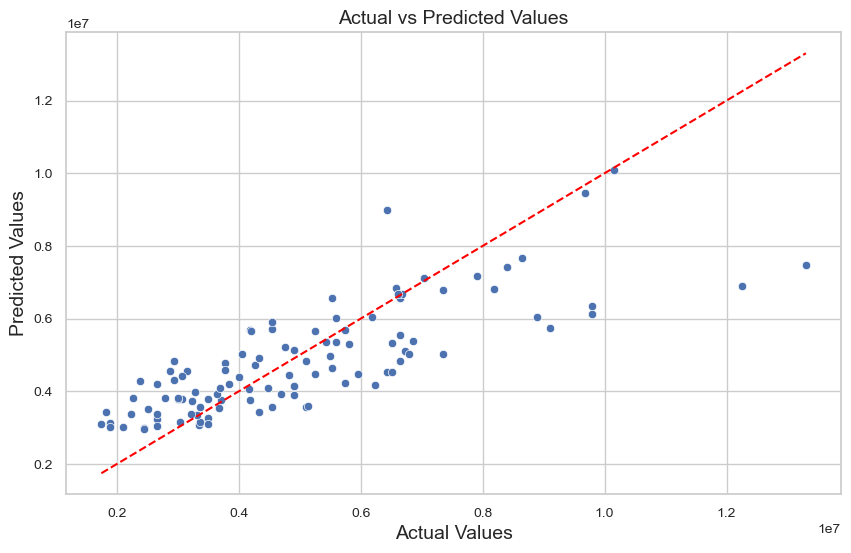

In [213]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.show()

### 8. CONCLUSION


The Gradient Boosting Regressor model shows a moderate level of performance with an R¬≤ of 0.67, indicating that it explains a good portion of the variance in house prices. However, the high MSE and MAE values suggest that the model's predictions still carry significant errors. This could be due to the complexity of the housing market, where numerous interacting factors influence prices. Future work could focus on further refining the model, possibly by including more dataset, incorporating additional features, reducing noise, or exploring alternative modeling approaches to improve accuracy.